#  We Rate Dogs

In [129]:
#Importing our necessary libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Gathering

In [130]:
#reading in our twitter archive dataset
tac = pd.read_csv('twitter-archive-enhanced.csv')
tac.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [131]:
#Checking for ensure we got our data
tac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [132]:
#gathering our image prediction data and then reading it into a dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [133]:
#read our image predictions file into a dataframe
img_pred = pd.read_csv('image-predictions.tsv',  sep='\t')
img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [134]:
#Checking to ensure we got our data
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [135]:
# Initiating the Tweepy API

auth = tweepy.OAuthHandler('cDB0XXvmcuasGpYsdwZmNJA1p', 'H8k47M8ANuT6t2nT1GNCqmqAkCccv7ZBKLjlM0iVlqiK7CEOUC')
auth.set_access_token('1139543476083798016-jxHnoF9LgqzMA0klY4Y1FTbKKnlnrY', 'sHszTJ0f57kJjfolJJXOkp2umtG6kVESm41qDAYr4Udtr')

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [136]:
# Next we will create a list of tweet ids
tweet_id = tac['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [137]:
#We will now call the first tweet in our list to see what data gets returned
first_tweet = api.get_status(tweet_id[0])
first_tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [138]:
# Creating a text file and then looping over our tweet ids and writing each tweet to our txt file
'''with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for id in tweet_id:
        try:
            page = api.get_status(id, tweet_mode = 'extended')
            favorites = page['favorite_count']
            retweet_count = page['retweet_count']
            f.write(str(id) + ' ' + str(favorites) + ' ' + str(retweet_count) + '\n')                

        except Exception as e:
            failed_tweets.append(id)'''

"with open('tweet_json.txt', 'w', encoding='utf8') as f:\n    for id in tweet_id:\n        try:\n            page = api.get_status(id, tweet_mode = 'extended')\n            favorites = page['favorite_count']\n            retweet_count = page['retweet_count']\n            f.write(str(id) + ' ' + str(favorites) + ' ' + str(retweet_count) + '\n')                \n\n        except Exception as e:\n            failed_tweets.append(id)"

In [140]:
# Create a pandas dataframe to house our data
twtr_df = pd.DataFrame(columns=['tweet_id', 'favorite_count', 'retweet_count'])

In [141]:
# We'll read our text file line by line and extract the necessary info into a pandas dataframe
with open('tweet_json.txt', 'r') as f:
    for line in f:
        tweet_id, favorite_count, retweet_count = line[:-1].split(' ')
        twtr_df = twtr_df.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count},ignore_index=True)        
        

In [142]:
# Now we inspect our dataframe to ensure it was all done correctly
twtr_df.sample(5)

,tweet_id,favorite_count,retweet_count
91,874296783580663808,25239,3949
362,828011680017821696,10756,2263
2089,670442337873600512,640,199
1184,715928423106027520,3270,907
2245,667524857454854144,1675,1096


# Assessing

### Twitter Archive Enhanced

In [143]:
#Checking for missing data - Twitter Archive Enhanced
tac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The first thing that jumps out at me is that 181 rows contain a value in retweeted_status_id. There are most likely retweets in this data set which explains at least a portion of the discrepancy between the rows in this data set and the image prediction one.            

A few more obvious items to note are:
 - that timestamp is formatted as a string
 - tweet_id should be formatted as a string
 - doggo, floofer, pupper, puppo should be consolidated into one column

In [144]:
#We'll check our twitter archive data set to check for duplicated tweet ids
tac[tac.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


It appears as though we do not have duplicate tweet ids in this dataset

In [145]:
# We'll use value_counts to inspect our numerator column
tac.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

It seems odd that we have scores as high as 1776, this definitely seems like it's a quality issue.

In [146]:
# We'll use value_counts to inspect our denominator column
tac.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

The denominator column also appears to have an issue. All rows should contain a denominator of 10.

In [147]:
# Using Value counts to inspect the name column
tac.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
an               7
Buddy            7
Bailey           7
Toby             7
Daisy            7
Koda             6
Scout            6
Dave             6
Jax              6
Stanley          6
Rusty            6
Jack             6
Leo              6
Bella            6
Oscar            6
Milo             6
Oakley           5
              ... 
Buddah           1
Blakely          1
Ben              1
Ember            1
Huxley           1
Benny            1
this             1
Clarq            1
Tedders          1
Koko             1
Orion            1
Norman           1
Skittles         1
Remus            1
Beebop           1
Sparky           1
Izzy             1
Bobby            1
Willow           1
Hanz             1
Barry            1
Bones       

745 Rows have "None" in the name field, 55 have the name "a" that doesn't seem correct. We also have inconsistencies in terms of using upper and lower case for dog names.

In [148]:
# Use the is null function to find rows that have missing photos
np.where(pd.isnull(tac.expanded_urls))

(array([  30,   55,   64,  113,  148,  179,  185,  186,  188,  189,  218,
         228,  234,  274,  290,  291,  313,  342,  346,  375,  387,  409,
         427,  498,  513,  570,  576,  611,  701,  707,  843,  857,  967,
        1005, 1080, 1295, 1345, 1445, 1446, 1474, 1479, 1497, 1523, 1598,
        1605, 1618, 1663, 1689, 1774, 1819, 1844, 1895, 1905, 1914, 1940,
        2038, 2149, 2189, 2298], dtype=int64),)

In [149]:
# Using iloc to confirm that row 30 is missing a value in the expanded url column
tac.iloc[30]

tweet_id                                                     886267009285017600
in_reply_to_status_id                                               8.86266e+17
in_reply_to_user_id                                                 2.28118e+09
timestamp                                             2017-07-15 16:51:35 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @NonWhiteHat @MayhewMayhem omg hello tanner yo...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

### Image Predictions

#### Column Headers

(From the Udacity Project Motivation page) 

- tweet_id is the last part of the tweet URL after "status/"
- p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf is how confident the algorithm is in its #1 prediction
- p1_dog is whether or not the #1 prediction is a breed of dog
- p2 is the algorithm's second most likely prediction → Labrador
- p2_conf is how confident the algorithm is in its #2 prediction
- p2_dog is whether or not the #2 prediction is a breed of dog


In [150]:
#Checking for missing data - Image Predictions
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Our image predictions dataset has incorrect data types for tweet_id. It's formatted as an int so we'll need to convert to a string. 

In [151]:
# Sampling our data
img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1137,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,Maltese_dog,0.952070,True,toy_poodle,0.027271,True,miniature_poodle,0.004874,True
1483,781251288990355457,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg,2,Mexican_hairless,0.887771,True,Italian_greyhound,0.030666,True,seat_belt,0.026730,False
1793,831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,cocker_spaniel,0.263323,True,Brittany_spaniel,0.200550,True,doormat,0.193414,False
1886,847962785489326080,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,0.882654,False,mink,0.066880,False,otter,0.025679,False


As part of my visual assessment, I opened the image predictions file in Excel. When exploring the p1, p2 and p3 columns something that immediately jumped out at me is that a lot of the supposed breeds are not even dogs (Ex: hen, box_turtle, Newfoundland, ox, guinea_pig, etc.) I'm not quite sure what to do with this but it's something to take note of.

## Quality


### TAC

- Not all rows are original tweets. Some of our rows are retweets
- Remove all columns that are related to retweets. (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id)
- There seems to be outliers in our rating_numerator column, we have values as high as 1776.
- Our timestamp column is not the right data type. It's currently a string, it should be a datetime data type. 
- We also have incorrect values for the rating_denominator column. All values should be 10.
- In our name column, we have 745 Rows that have the value "None" and 55 have the name "a".
- 59 values in the expanded_url column are null, drop this column as it doesn't provide us much value
- tweet_ID is an int, it should be formatted as string
- create a rating column by dividing numerator by denominator and then drop those two columns
- after merging doggo, floofer, pupper and puppo into a single column, convert to categorical data type

### Image Predictions

- tweet_id is an int, should be formatted as a string
- change column names to more informative names
- drop p2 and p3 columns as they serve no purpose
- change breed names to title case and data type to categorical

## Tidiness

- In the tac dataset, the following columns doggo, floofer, pupper and puppo should be consolidated into a single column. 
- The majority of the columns will not be useful for our analysis, we should be able to consolidate into a single table. 


# Clean

I'll begin by making copies of all my datasets to keep the originals unaltered. 

In [152]:
# making copies of dataframes
twtr_arc_clean = tac.copy()
twtr_df_clean = twtr_df.copy()
img_clean = img_pred.copy()

### Define

Convert tweet_id in twtr_arc_clean and img_clean from an int to a string

### Code

In [153]:
# converting tweet ids to string
twtr_arc_clean.tweet_id = twtr_arc_clean.tweet_id.astype(str)
img_clean.tweet_id = img_clean.tweet_id.astype(str)

### Test

In [154]:
# Print data types to confirm it was done correctly
print(twtr_arc_clean.tweet_id.dtype)
print(img_clean.tweet_id.dtype)

object
object


### Define

Convert timestamp in twtr_arc_clean to datetime

### Code

In [155]:
twtr_arc_clean.timestamp = pd.to_datetime(twtr_arc_clean['timestamp'])

### Test

In [156]:
twtr_arc_clean.timestamp.dtype

datetime64[ns, UTC]

### Define

We will now remove all rows that contain retweets, and then remove the unnecessary columns relating to retweets.

### Code

In [157]:
twtr_arc_clean = twtr_arc_clean[twtr_arc_clean.retweeted_status_id.isnull()]

In [158]:
twtr_arc_clean.drop(['retweeted_status_id',
                     'retweeted_status_user_id',
                     'retweeted_status_timestamp',
                     'in_reply_to_status_id',
                     'in_reply_to_user_id'], axis=1, inplace=True)

### Test

In [159]:
twtr_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 220.9+ KB


### Define

Remove all rows with a numerator above 15, remove all rows with a denominator that is not 10.

### Code

In [160]:
twtr_arc_clean = twtr_arc_clean[twtr_arc_clean.rating_numerator < 16]

In [161]:
twtr_arc_clean = twtr_arc_clean[twtr_arc_clean.rating_denominator == 10]

### Test

In [162]:
twtr_arc_clean.rating_numerator.value_counts()

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
0       2
15      1
Name: rating_numerator, dtype: int64

In [163]:
twtr_arc_clean.rating_denominator.value_counts()

10    2144
Name: rating_denominator, dtype: int64

### Define

Create a new rating column by dividing the numerator by the denominator, multiplying by ten then dropping the individual columns

### Code

In [164]:
twtr_arc_clean['rating'] = (twtr_arc_clean.rating_numerator / twtr_arc_clean.rating_denominator) * 10

In [165]:
twtr_arc_clean.rating = twtr_arc_clean.rating.astype('int')

In [166]:
twtr_arc_clean.drop(['rating_numerator',
                     'rating_denominator'],
                      axis=1, inplace=True)

### Test

In [167]:
twtr_arc_clean['rating'].value_counts()

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
0       2
15      1
Name: rating, dtype: int64

In [168]:
twtr_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2144 non-null object
timestamp        2144 non-null datetime64[ns, UTC]
source           2144 non-null object
text             2144 non-null object
expanded_urls    2094 non-null object
name             2144 non-null object
doggo            2144 non-null object
floofer          2144 non-null object
pupper           2144 non-null object
puppo            2144 non-null object
rating           2144 non-null int32
dtypes: datetime64[ns, UTC](1), int32(1), object(9)
memory usage: 192.6+ KB


### Define

In the name field, we have various names that are not exactly dog names (a, the, an). While this list might not be comprehensive I have decided to only rename this selection as they are reoccuring. From my perspective the amount of effort required to go item by item trying to find all instances of name errors would consume a large amount of time and would not bring us much value, in my opinion. I will be changing the 3 instances earlier indicated to the value "None". I will then convert all names to title case.

### Code

In [169]:
# Using the replace function to convert incorrect names to None
twtr_arc_clean.name.replace(['a', 'the', 'an'], 'None', inplace=True)

In [170]:
# Converting our names to title case
twtr_arc_clean.name.str.title()

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          Such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
30          None
          ...   
2325      Walter
2326       Quite
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

### Test

In [171]:
# Using Value counts to check our work
twtr_arc_clean.name.value_counts()

None           725
Charlie         11
Lucy            11
Cooper          10
Oliver          10
Tucker           9
Penny            9
Sadie            8
Winston          8
Lola             8
Daisy            7
Toby             7
Stanley          6
Bella            6
Bailey           6
Jax              6
Oscar            6
Koda             6
Bo               6
Chester          5
Rusty            5
Leo              5
Bentley          5
Dave             5
Louis            5
Scout            5
Buddy            5
Milo             5
Scooter          4
Oakley           4
              ... 
Mattie           1
Brudge           1
Ruffles          1
Ralf             1
Dotsy            1
Swagger          1
Orion            1
Benny            1
Norman           1
Skittles         1
Remus            1
Beebop           1
Sparky           1
Sierra           1
Izzy             1
Bobby            1
Willow           1
Barry            1
Chevy            1
Kenny            1
Meera            1
Shakespeare 

### Define

Drop expanded_url column

### Code

In [172]:
# Dropping expanded_urls column
twtr_arc_clean.drop(['expanded_urls'],
                      axis=1, inplace=True)

### Test

In [173]:
twtr_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id     2144 non-null object
timestamp    2144 non-null datetime64[ns, UTC]
source       2144 non-null object
text         2144 non-null object
name         2144 non-null object
doggo        2144 non-null object
floofer      2144 non-null object
pupper       2144 non-null object
puppo        2144 non-null object
rating       2144 non-null int32
dtypes: datetime64[ns, UTC](1), int32(1), object(8)
memory usage: 175.9+ KB


## Image Predictions

### Define

Dropping p2 and p3 columns

### Code

In [174]:
img_clean.drop(['p2',
               'p2_conf',
               'p2_dog',
               'p3',
               'p3_conf',
               'p3_dog'],
                axis=1, inplace=True)

### Test

In [175]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


### Define

- Changing column names to be more descriptive.
- Changing breed names in column p1 to title case
- Changing p1 to categorical data type
- Changing confidence_level to int and multiplying 100


### Code

In [176]:
img_clean.rename(columns = {'p1': 'breed_prediction', 
                            'p1_conf': 'confidence_level', 
                            'p1_dog': 'is_dog'}, inplace = True)
                               

In [177]:
img_clean.breed_prediction = img_clean.breed_prediction.str.title()

In [178]:
img_clean.breed_prediction = img_clean.breed_prediction.astype('category')

In [179]:
img_clean.confidence_level = img_clean.confidence_level * 100

In [180]:
img_clean.confidence_level = img_clean.confidence_level.astype('int')

In [181]:
img_clean.confidence_level

0       46
1       50
2       59
3       40
4       56
5       65
6       93
7       69
8       96
9       20
10      77
11      50
12      26
13      48
14      19
15      58
16      29
17      96
18       8
19      17
20      85
21      91
22      41
23      85
24      33
25      99
26      32
27      97
28      52
29      40
        ..
2045    99
2046    73
2047    30
2048    79
2049    73
2050    33
2051    80
2052    13
2053    82
2054    99
2055    80
2056    70
2057    46
2058    71
2059    62
2060    95
2061    99
2062    96
2063    37
2064    95
2065    51
2066    48
2067    56
2068    34
2069    42
2070    55
2071    17
2072    71
2073    32
2074     9
Name: confidence_level, Length: 2075, dtype: int32

### Test

In [182]:
# Checking to ensure columns were renamed correctly and data type was properly changed
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
breed_prediction    2075 non-null category
confidence_level    2075 non-null int32
is_dog              2075 non-null bool
dtypes: bool(1), category(1), int32(1), int64(1), object(2)
memory usage: 75.8+ KB


In [183]:
# Confirming our breed prediction column is now title case
img_clean.breed_prediction

0            Welsh_Springer_Spaniel
1                           Redbone
2                   German_Shepherd
3               Rhodesian_Ridgeback
4                Miniature_Pinscher
5              Bernese_Mountain_Dog
6                        Box_Turtle
7                              Chow
8                     Shopping_Cart
9                  Miniature_Poodle
10                 Golden_Retriever
11                    Gordon_Setter
12                     Walker_Hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English_Setter
17                              Hen
18                 Desktop_Computer
19                Italian_Greyhound
20                      Maltese_Dog
21                 Three-Toed_Sloth
22                               Ox
23                 Golden_Retriever
24                         Malamute
25                       Guinea_Pig
26      Soft-Coated_Wheaten_Terrier
27                        Ch

## Tidiness

### Define

Consolidate columns doggo, floofer, pupper and puppo into a single column

### Code 

In [184]:
# Replace None in dog stages with no value
twtr_arc_clean.pupper.replace('None', '', inplace = True)
twtr_arc_clean.doggo.replace('None', '', inplace = True)
twtr_arc_clean.puppo.replace('None', '', inplace = True)
twtr_arc_clean.floofer.replace('None', '', inplace = True)

In [185]:
# Creating a dog stage column that combines all four into one
twtr_arc_clean['dog_stage'] = twtr_arc_clean.pupper + twtr_arc_clean.doggo + \
twtr_arc_clean.puppo + twtr_arc_clean.floofer

In [186]:
# Checking out our results
twtr_arc_clean.dog_stage.value_counts()

                1801
pupper           223
doggo             75
puppo             24
pupperdoggo       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [187]:
# Renaming our dog stages
twtr_arc_clean.dog_stage.replace('', 'None', inplace = True)
twtr_arc_clean.dog_stage.replace('pupper', 'Pupper', inplace = True)
twtr_arc_clean.dog_stage.replace('floofer', 'Floofer', inplace = True)
twtr_arc_clean.dog_stage.replace('doggo', 'Doggo', inplace = True)
twtr_arc_clean.dog_stage.replace('puppo', 'Puppo', inplace = True)
twtr_arc_clean.dog_stage.replace('doggofloofer', 'Doggo/Floofer', inplace = True)
twtr_arc_clean.dog_stage.replace('doggopupper', 'Doggo/Pupper', inplace = True)
twtr_arc_clean.dog_stage.replace('doggopuppo', 'Doggo/Puppo', inplace = True)

In [188]:
twtr_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id     2144 non-null object
timestamp    2144 non-null datetime64[ns, UTC]
source       2144 non-null object
text         2144 non-null object
name         2144 non-null object
doggo        2144 non-null object
floofer      2144 non-null object
pupper       2144 non-null object
puppo        2144 non-null object
rating       2144 non-null int32
dog_stage    2144 non-null object
dtypes: datetime64[ns, UTC](1), int32(1), object(9)
memory usage: 192.6+ KB


In [189]:
# Dropping our four dog stage columns
twtr_arc_clean.drop(['doggo',
                     'floofer',
                     'pupper',
                     'puppo'],
                      axis=1, inplace=True)

In [190]:
# Changing column to categorical
twtr_arc_clean.dog_stage = twtr_arc_clean.dog_stage.astype('category')

### Test

In [191]:
# We're now checking our work
twtr_arc_clean.dog_stage.value_counts()

None             1801
Pupper            223
Doggo              75
Puppo              24
pupperdoggo        10
Floofer             9
Doggo/Puppo         1
Doggo/Floofer       1
Name: dog_stage, dtype: int64

In [192]:
twtr_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id     2144 non-null object
timestamp    2144 non-null datetime64[ns, UTC]
source       2144 non-null object
text         2144 non-null object
name         2144 non-null object
rating       2144 non-null int32
dog_stage    2144 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int32(1), object(4)
memory usage: 111.3+ KB


### Define

Tweet_count and Favorite_Count need to be converted to int

### Code

In [325]:
twtr_df_clean.favorite_count = twtr_df_clean.favorite_count.astype(int)
twtr_df_clean.retweet_count = twtr_df_clean.retweet_count.astype(int)

### Test

In [326]:
twtr_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null object
favorite_count    2334 non-null int32
retweet_count     2334 non-null int32
dtypes: int32(2), object(1)
memory usage: 36.5+ KB


### Define

We will now merge our all 3 tabs into a single one, then drop any columns that we will not be needing for our analysis. 

### Code

In [327]:
twitter_archive_master = twtr_arc_clean.merge(twtr_df_clean, on = 'tweet_id', how ='inner')


In [328]:
twitter_archive_master = twitter_archive_master.merge(img_clean, on = 'tweet_id', how = 'inner')


In [329]:
# We'll now drop source and text as I do not anticipate using these two columns for analysis
twitter_archive_master.drop(['source','text'], axis=1, inplace=True)

### Test

In [330]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 12 columns):
tweet_id            1965 non-null object
timestamp           1965 non-null datetime64[ns, UTC]
name                1965 non-null object
rating              1965 non-null int32
dog_stage           1965 non-null category
favorite_count      1965 non-null int32
retweet_count       1965 non-null int32
jpg_url             1965 non-null object
img_num             1965 non-null int64
breed_prediction    1965 non-null category
confidence_level    1965 non-null int32
is_dog              1965 non-null bool
dtypes: bool(1), category(2), datetime64[ns, UTC](1), int32(4), int64(1), object(3)
memory usage: 143.8+ KB


### Define

I'm gonna drop all rows that have a value of false in the is_dog column then drop the column itself. That way our analysis is based only on dogs that our prediction model was able to more accurately assess.

### Code

In [331]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.is_dog != False]

In [332]:
twitter_archive_master.drop('is_dog', axis=1, inplace=True)

### Test

In [333]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1 to 1964
Data columns (total 11 columns):
tweet_id            1453 non-null object
timestamp           1453 non-null datetime64[ns, UTC]
name                1453 non-null object
rating              1453 non-null int32
dog_stage           1453 non-null category
favorite_count      1453 non-null int32
retweet_count       1453 non-null int32
jpg_url             1453 non-null object
img_num             1453 non-null int64
breed_prediction    1453 non-null category
confidence_level    1453 non-null int32
dtypes: category(2), datetime64[ns, UTC](1), int32(4), int64(1), object(3)
memory usage: 108.4+ KB


In [334]:
# Output our file to CSV before moving on to analysis
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<b> Now that we have cleaned our data we can finally move on to some analysis! </b>

## Analysis

While working through this dataset some of the questions that have piqued my interest are as follows:
- What are the most common breeds?
- Is there a correlation between breed and rating?
- What is the distribution for dog ratings?
- Which dogs have the highest favorite and retweet count?
- What are the most common dog names?

We'll begin by checking out the distribution of our data set to see if we can draw out any information.

In [335]:
twitter_archive_master.describe()

,rating,favorite_count,retweet_count,img_num,confidence_level
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,10.917412,8883.778390,2580.675843,1.214040,60.793531
std,1.696311,12928.735973,4699.478148,0.576415,26.015995
min,2.000000,75.000000,11.000000,1.000000,4.000000
25%,10.000000,2045.000000,601.000000,1.000000,38.000000
50%,11.000000,4234.000000,1314.000000,1.000000,61.000000
75%,12.000000,11078.000000,2970.000000,1.000000,84.000000
max,14.000000,161446.000000,81449.000000,4.000000,99.000000


So our lowest rated dog is a 2. Considering our mean is 10.9, this dog must have really done something badly! The retweet count and favorite count are quite interesting, they have massive ranges. The favorite count in particular has a low of 75, and a high of 161,446. The standard deviation is close to 13,000. Very interesting.

### Observation 1

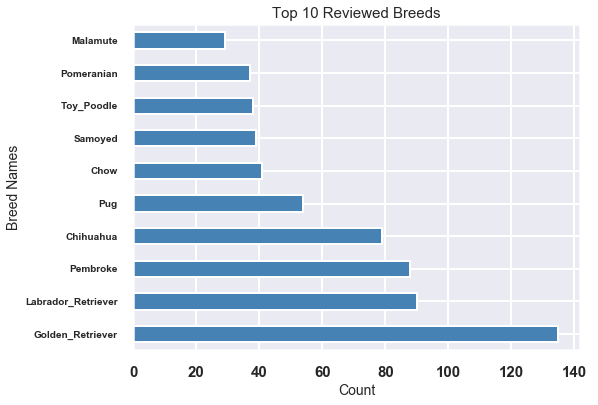

In [312]:
plt.rc('ytick',labelsize=8)
plt.rc('ytick',labelsize=10)
top_breeds = twitter_archive_master.breed_prediction.value_counts()[:10]
plt.figure(figsize=(8, 6))
top_breeds.plot(kind = 'barh', color=['steelblue'])

plt.title('Top 10 Reviewed Breeds', size=15)
plt.xlabel('Count', size=14)
plt.ylabel('Breed Names', size=14)
plt.show();

In [245]:
# Determine how many unique breeds in data set
twitter_archive_master.breed_prediction.nunique()

110

In [246]:
# Determine the number of total dogs
twitter_archive_master.breed_prediction.count()

1453

In [248]:
# Determine number of dogs in top 10
sum(Top_10)

630

In [267]:
# Add column to determine if dog is in top 10 breed 
twitter_archive_master['top_10'] = np.where(twitter_archive_master.breed_prediction.isin(Top_10_breeds), 'Top_10', 'Other')

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1 to 1964
Data columns (total 12 columns):
tweet_id            1453 non-null object
timestamp           1453 non-null datetime64[ns, UTC]
name                1453 non-null object
rating              1453 non-null int32
dog_stage           1453 non-null category
favorite_count      1453 non-null object
retweet_count       1453 non-null object
jpg_url             1453 non-null object
img_num             1453 non-null int64
breed_prediction    1453 non-null category
confidence_level    1453 non-null int32
top_10              1453 non-null object
dtypes: category(2), datetime64[ns, UTC](1), int32(2), int64(1), object(6)
memory usage: 131.1+ KB


In [269]:
# Checking to make sure our data was added correctly
twitter_archive_master['top_10'].value_counts()

Other     823
Top_10    630
Name: top_10, dtype: int64

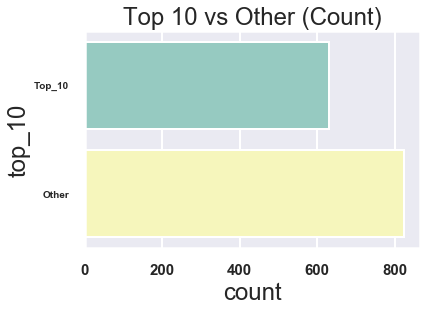

In [322]:
 ax = sns.countplot(y="top_10",  palette="Set3", orient='h', data=twitter_archive_master).set_title('Top 10 vs Other (Count)')

What I find to be interesting is that we have 110 unique breeds in this data set. The top 10 breeds represents 9% of all unique breeds in this dataset. However in terms of dogs reviewed the top 10 has been reviewed 43% of the time. With the most reviewed dog (Golden retriever) being reviewed a whopping 9.3% of the time. I'm curious as to whether this is by design or whether the reviewer have a predisposed bias towards these dogs.

Next let's check out the distribution of our dog_stage column

In [318]:
# Extracting all rows that do not have none in the dog stage column
dog_stage = twitter_archive_master[twitter_archive_master['dog_stage']!='None']

In [319]:
dog_stage.head()

,tweet_id,timestamp,name,rating,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed_prediction,confidence_level,top_10
9,890240255349198849,2017-07-26 15:59:51+00:00,Cassie,14,Doggo,30831,7014,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,51,Top_10
12,889665388333682689,2017-07-25 01:55:32+00:00,None,13,Puppo,46474,9546,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,96,Top_10
14,889531135344209921,2017-07-24 17:02:04+00:00,Stuart,13,Puppo,14612,2143,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,Golden_Retriever,95,Top_10
28,886366144734445568,2017-07-15 23:25:31+00:00,Roscoe,12,Pupper,20447,3040,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_Bulldog,99,Other
37,884162670584377345,2017-07-09 21:29:42+00:00,Yogi,12,Doggo,19674,2848,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_Shepherd,70,Other


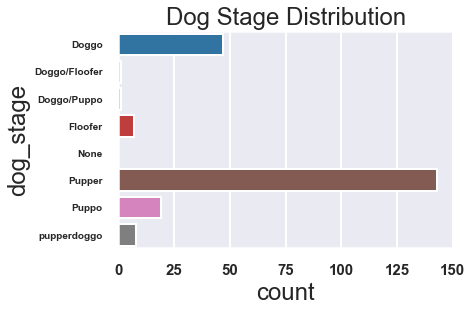

In [321]:
 ax = sns.countplot(y='dog_stage', data=dog_stage).set_title('Dog Stage Distribution');

It appears as though Pupper is far and away our leader, Doggo is the second most popular, Puppo in 3rd and Floofer in 4th.